## Classify fetal health in order to prevent child and maternal mortality

Installing Pycaret

In [82]:
!pip install pycaret

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


Import Libraries

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
import shap
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [6]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.5.3
Seaborn version:  0.13.0


# Context
Reduction of child mortality is reflected in several of the United Nations' Sustainable Development Goals and is a key indicator of human progress.
The UN expects that by 2030, countries end preventable deaths of newborns and children under 5 years of age, with all countries aiming to reduce under‑5 mortality to at least as low as 25 per 1,000 live births.

Parallel to notion of child mortality is of course maternal mortality, which accounts for 295 000 deaths during and following pregnancy and childbirth (as of 2017). The vast majority of these deaths (94%) occurred in low-resource settings, and most could have been prevented.

In light of what was mentioned above, Cardiotocograms (CTGs) are a simple and cost accessible option to assess fetal health, allowing healthcare professionals to take action in order to prevent child and maternal mortality. The equipment itself works by sending ultrasound pulses and reading its response, thus shedding light on fetal heart rate (FHR), fetal movements, uterine contractions and more.

# Dataset:

The “Fetal Health Classification” used for Principal Component Analysis (PCA) and classification models is obtained from Kaggle. The data set provides information about fetal health.

This dataset contains 2126 records of features extracted from Cardiotocogram exams, which were then classified by three expert obstetritians into 3 classes: Normal, Suspect and Pathological.

All attributes are numerical and they are listed bellow:

In [7]:
df = pd.read_csv('fetal_health.csv', engine="python")
df.head(500)

baseline value  accelerations  fetal_movement  uterine_contractions  \
0             120.0          0.000           0.000                 0.000   
1             132.0          0.006           0.000                 0.006   
2             133.0          0.003           0.000                 0.008   
3             134.0          0.003           0.000                 0.008   
4             132.0          0.007           0.000                 0.008   
..              ...            ...             ...                   ...   
495           127.0          0.011           0.033                 0.002   
496           130.0          0.014           0.092                 0.001   
497           130.0          0.016           0.084                 0.002   
498           130.0          0.015           0.115                 0.000   
499           130.0          0.014           0.084                 0.001   

     light_decelerations  severe_decelerations  prolongued_decelerations  \
0                  0.000                   0.0                       0.0   
1                  0.003                   0.0                       0.0   
2                  0.003                   0.0                       0.0   
3                  0.003                   0.0                       0.0   
4                  0.000                   0.0                       0.0   
..                   ...                   ...                       ...   
495                0.000                   0.0                       0.0   
496                0.000                   0.0                       0.0   
497                0.000                   0.0                       0.0   
498                0.000                   0.0                       0.0   
499                0.000                   0.0                       0.0   

     abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                               73.0                                   0.5   
1                               17.0                                   2.1   
2                               16.0                                   2.1   
3                               16.0                                   2.4   
4                               16.0                                   2.4   
..                               ...                                   ...   
495                             38.0                                   1.4   
496                             32.0                                   2.4   
497                             34.0                                   2.1   
498                             31.0                                   2.6   
499                             34.0                                   2.1   

     percentage_of_time_with_abnormal_long_term_variability  ...  \
0                                                 43.0       ...   
1                                                  0.0       ...   
2                                                  0.0       ...   
3                                                  0.0       ...   
4                                                  0.0       ...   
..                                                 ...       ...   
495                                                0.0       ...   
496                                                0.0       ...   
497                                                0.0       ...   
498                                                0.0       ...   
499                                                0.0       ...   

     histogram_min  histogram_max  histogram_number_of_peaks  \
0             62.0          126.0                        2.0   
1             68.0          198.0                        6.0   
2             68.0          198.0                        5.0   
3             53.0          170.0                       11.0   
4             53.0          170.0                        9.0   
..             ...            ...        

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

Dataset Cleanup

In [9]:
df = df.drop_duplicates()

print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [10]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


In [15]:
columns_to_drop = ['mean_value_of_long_term_variability', 'histogram_variance',
       'histogram_median', 'uterine_contractions', 'baseline value',
       'histogram_tendency', 'severe_decelerations',
       'mean_value_of_short_term_variability', 'fetal_movement',
       'histogram_width', 'histogram_min', 'light_decelerations',
       'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes']

df.drop(columns=columns_to_drop, axis=1, inplace=True)

KeyError: "['mean_value_of_long_term_variability', 'histogram_variance', 'histogram_median', 'uterine_contractions', 'baseline value', 'histogram_tendency', 'severe_decelerations', 'mean_value_of_short_term_variability', 'fetal_movement', 'histogram_width', 'histogram_min', 'light_decelerations', 'histogram_max', 'histogram_number_of_peaks', 'histogram_number_of_zeroes'] not found in axis"

Exploratory Data Analysis

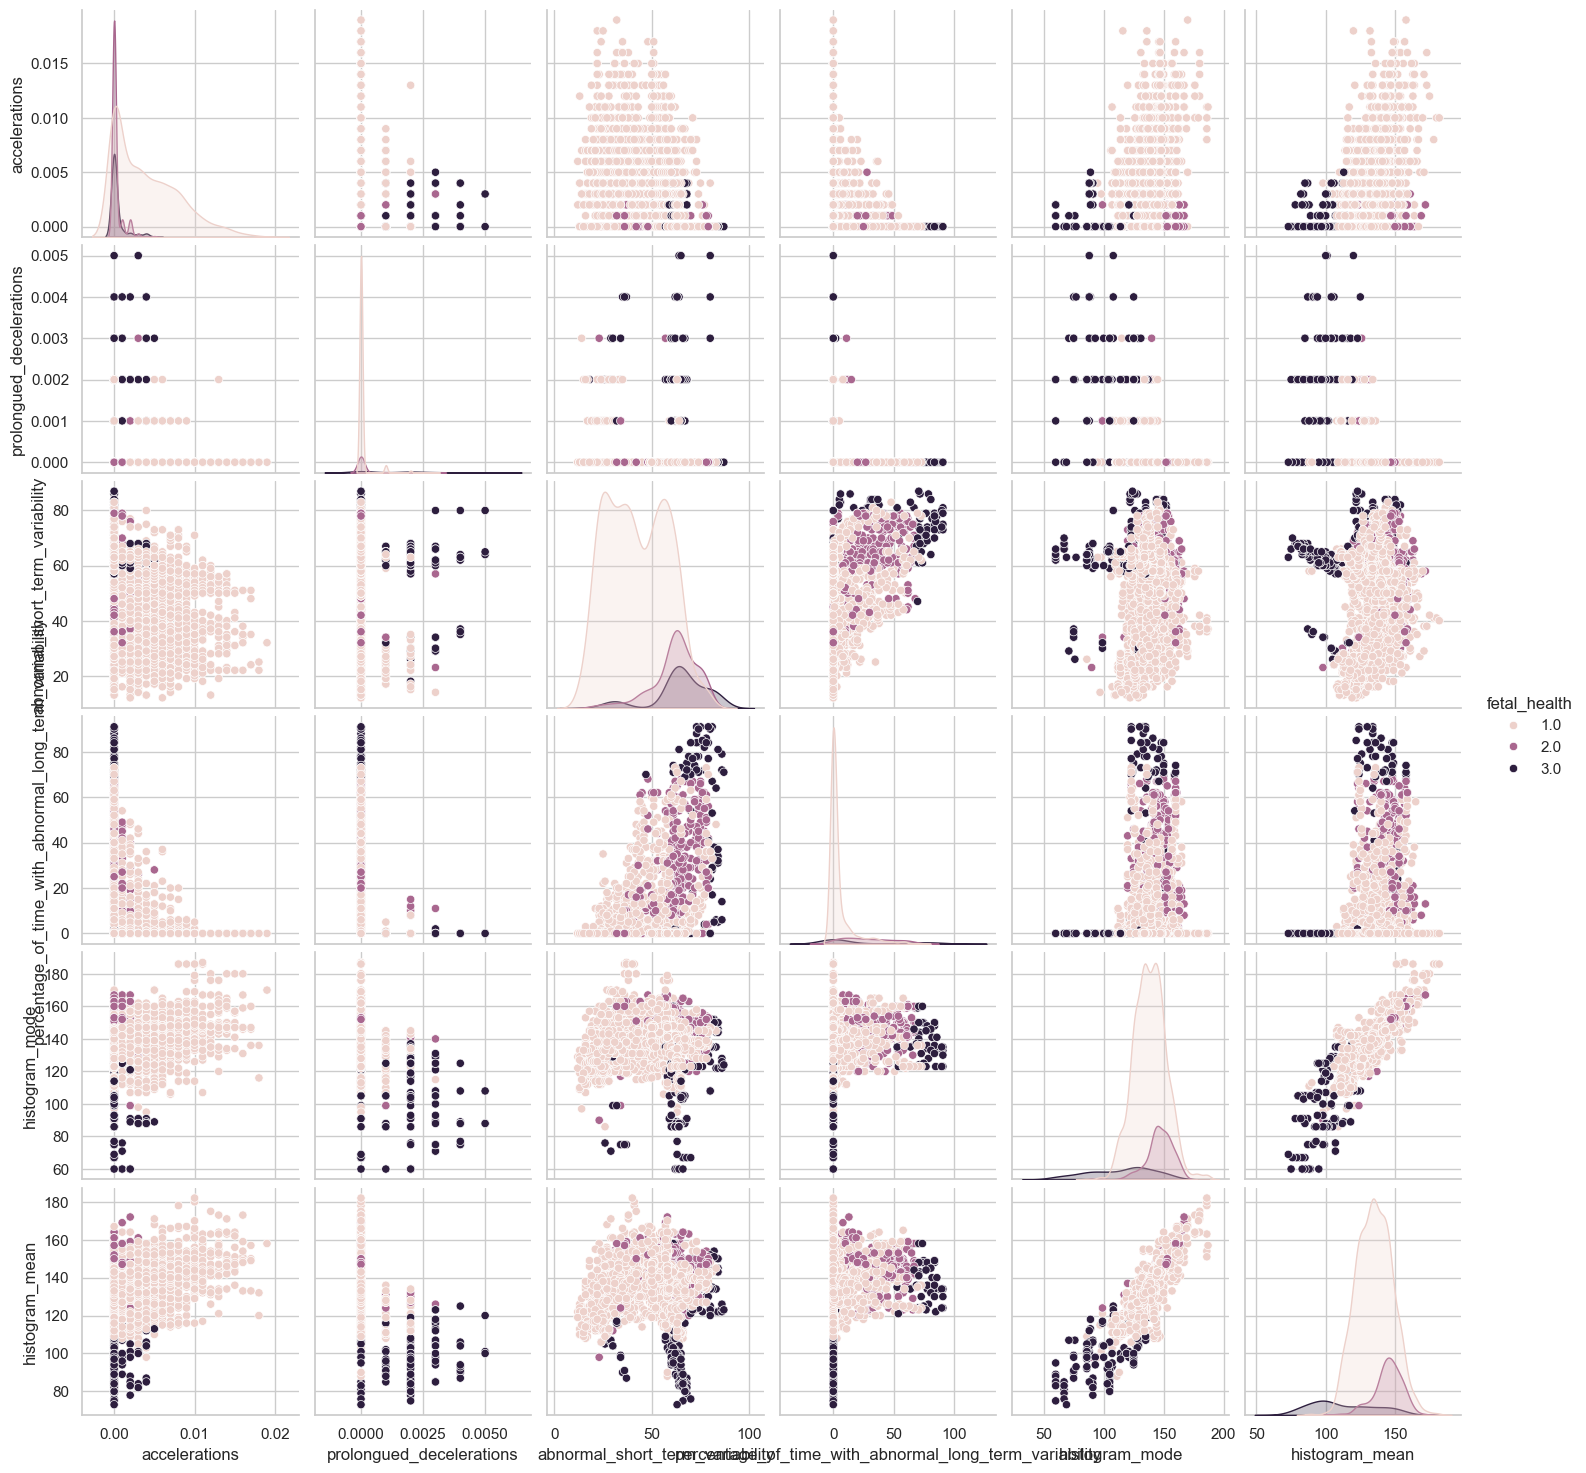

In [12]:
sns.pairplot(df, hue='fetal_health')
plt.show()

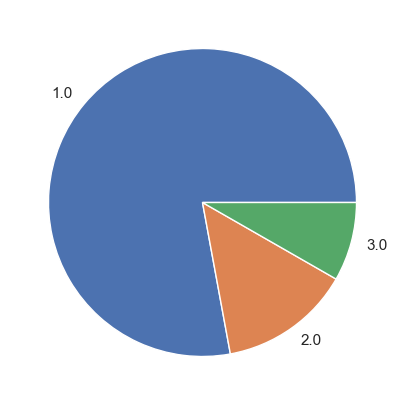

In [16]:
y =df['fetal_health']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

Data Matrix

In [19]:
X = df.drop(columns=['fetal_health'])
X.head(500)

accelerations  prolongued_decelerations  abnormal_short_term_variability  \
0            0.000                       0.0                             73.0   
1            0.006                       0.0                             17.0   
2            0.003                       0.0                             16.0   
3            0.003                       0.0                             16.0   
4            0.007                       0.0                             16.0   
..             ...                       ...                              ...   
500          0.014                       0.0                             29.0   
501          0.015                       0.0                             31.0   
502          0.008                       0.0                             36.0   
503          0.008                       0.0                             34.0   
504          0.008                       0.0                             40.0   

     percentage_of_time_with_abnormal_long_term_variability  histogram_mode  \
0                                                 43.0                120.0   
1                                                  0.0                141.0   
2                                                  0.0                141.0   
3                                                  0.0                137.0   
4                                                  0.0                137.0   
..                                                 ...                  ...   
500                                                0.0                150.0   
501                                                0.0                150.0   
502                                                0.0                154.0   
503                                                0.0                159.0   
504                                                0.0                129.0   

     histogram_mean  
0             137.0  
1             136.0  
2             135.0  
3             134.0  
4             136.0  
..              ...  
500           144.0  
501           144.0  
502           148.0  
503           146.0  
504           139.0  

[500 rows x 6 columns]

Standardize the Data

In [20]:
X.describe().transpose()

count        mean  \
accelerations                                       2113.0    0.003188   
prolongued_decelerations                            2113.0    0.000159   
abnormal_short_term_variability                     2113.0   46.993848   
percentage_of_time_with_abnormal_long_term_vari...  2113.0    9.795078   
histogram_mode                                      2113.0  137.454330   
histogram_mean                                      2113.0  134.599621   

                                                          std   min    25%  \
accelerations                                        0.003871   0.0    0.0   
prolongued_decelerations                             0.000592   0.0    0.0   
abnormal_short_term_variability                     17.177782  12.0   32.0   
percentage_of_time_with_abnormal_long_term_vari...  18.337073   0.0    0.0   
histogram_mode                                      16.402026  60.0  129.0   
histogram_mean                                      15.610422  73.0  125.0   

                                                        50%      75%      max  
accelerations                                         0.002    0.006    0.019  
prolongued_decelerations                              0.000    0.000    0.005  
abnormal_short_term_variability                      49.000   61.000   87.000  
percentage_of_time_with_abnormal_long_term_vari...    0.000   11.000   91.000  
histogram_mode                                      139.000  148.000  187.000  
histogram_mean                                      136.000  145.000  182.000

In [21]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(500)

accelerations  prolongued_decelerations  abnormal_short_term_variability  \
0        -0.823776                  -0.26964                         1.514300   
1         0.726444                  -0.26964                        -1.746497   
2        -0.048666                  -0.26964                        -1.804726   
3        -0.048666                  -0.26964                        -1.804726   
4         0.984814                  -0.26964                        -1.804726   
..             ...                       ...                              ...   
495       2.793404                  -0.26964                        -1.047755   
496       3.051774                  -0.26964                        -0.931298   
497       1.243184                  -0.26964                        -0.640155   
498       1.243184                  -0.26964                        -0.756612   
499       1.243184                  -0.26964                        -0.407241   

     percentage_of_time_with_abnormal_long_term_variability  histogram_mode  \
0                                             1.811237            -1.064409   
1                                            -0.534294             0.216224   
2                                            -0.534294             0.216224   
3                                            -0.534294            -0.027706   
4                                            -0.534294            -0.027706   
..                                                 ...                  ...   
495                                          -0.534294             0.765066   
496                                          -0.534294             0.765066   
497                                          -0.534294             1.008996   
498                                          -0.534294             1.313909   
499                                          -0.534294            -0.515566   

     histogram_mean  
0          0.153804  
1          0.089729  
2          0.025654  
3         -0.038421  
4          0.089729  
..              ...  
495        0.602329  
496        0.602329  
497        0.858628  
498        0.730478  
499        0.281954  

[500 rows x 6 columns]

In [22]:
X.describe().transpose()

count          mean  \
accelerations                                       2113.0  6.725440e-18   
prolongued_decelerations                            2113.0  4.035264e-17   
abnormal_short_term_variability                     2113.0 -1.345088e-17   
percentage_of_time_with_abnormal_long_term_vari...  2113.0  2.690176e-17   
histogram_mode                                      2113.0 -1.614106e-16   
histogram_mean                                      2113.0  3.497229e-16   

                                                         std       min  \
accelerations                                       1.000237 -0.823776   
prolongued_decelerations                            1.000237 -0.269640   
abnormal_short_term_variability                     1.000237 -2.037640   
percentage_of_time_with_abnormal_long_term_vari...  1.000237 -0.534294   
histogram_mode                                      1.000237 -4.723360   
histogram_mean                                      1.000237 -3.946992   

                                                         25%       50%  \
accelerations                                      -0.823776 -0.307036   
prolongued_decelerations                           -0.269640 -0.269640   
abnormal_short_term_variability                    -0.873069  0.116815   
percentage_of_time_with_abnormal_long_term_vari... -0.534294 -0.534294   
histogram_mode                                     -0.515566  0.094259   
histogram_mean                                     -0.615095  0.089729   

                                                         75%       max  
accelerations                                       0.726444  4.085254  
prolongued_decelerations                           -0.269640  8.183605  
abnormal_short_term_variability                     0.815557  2.329499  
percentage_of_time_with_abnormal_long_term_vari...  0.065725  4.429504  
histogram_mode                                      0.643101  3.021419  
histogram_mean                                      0.666404  3.037176

Observations and Variables

In [23]:
observations = list(df.index)
variables = list(df.columns)

Box and Whisker Plots

C:\Users\raiha\AppData\Local\Temp\ipykernel_9352\3697733211.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45)


[Text(0, 0, 'accelerations'),
 Text(1, 0, 'prolongued_decelerations'),
 Text(2, 0, 'abnormal_short_term_variability'),
 Text(3, 0, 'percentage_of_time_with_abnormal_long_term_variability'),
 Text(4, 0, 'histogram_mode'),
 Text(5, 0, 'histogram_mean')]

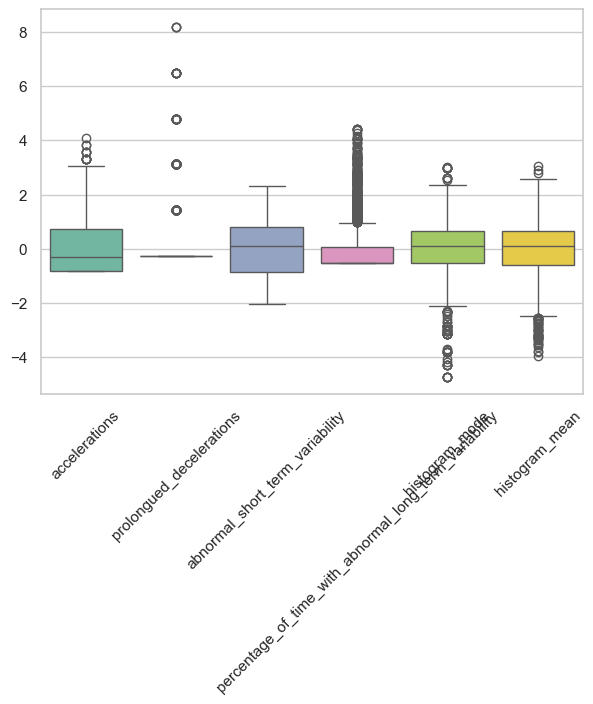

In [24]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

C:\Users\raiha\AppData\Local\Temp\ipykernel_9352\2123798454.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45);


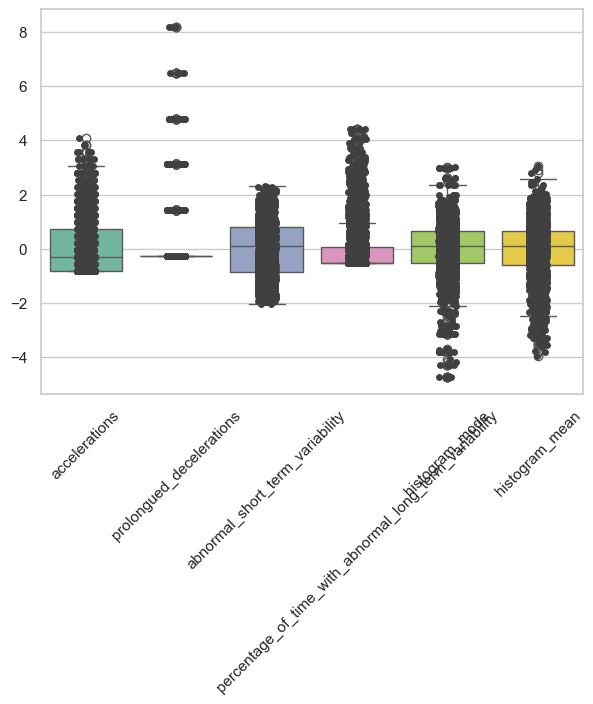

In [25]:
# Using swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

Correlation Matrix

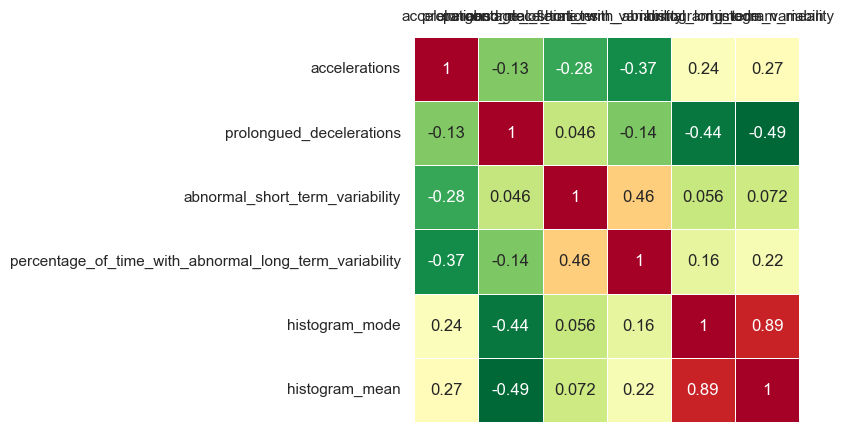

In [26]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

## Principal Component Analysis

Using PCA Library

In [28]:
!pip install pca

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/51.3 kB ? eta -:--:--
   ---------------------------------------- 51.3/51.3 kB ? eta 0:00:00


In [29]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [6] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [6] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


Principal Components

In [30]:
out['PC']

PC1        PC2        PC3
0    -18.896176  39.409977   5.004949
1     13.559465 -24.517278  14.948416
2     14.464697 -24.668917  15.726675
3     17.182932 -22.343655  16.205968
4     16.110828 -23.184422  16.114164
...         ...        ...        ...
2121 -36.579789  12.321232 -15.633573
2122 -33.009101  11.509422 -16.713095
2123 -32.867921  10.567375 -18.895153
2124 -35.112813  14.524429 -13.313809
2125 -32.424641  21.921732  -3.406249

[2113 rows x 3 columns]

Scatter Plot

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.


(<Figure size 2500x1500 with 1 Axes>,
 <AxesSubplot: title={'center': '3 Principal Components explain [99.99%] of the variance'}, xlabel='PC1 (48.2% expl.var)', ylabel='PC2 (34.8% expl.var)'>)

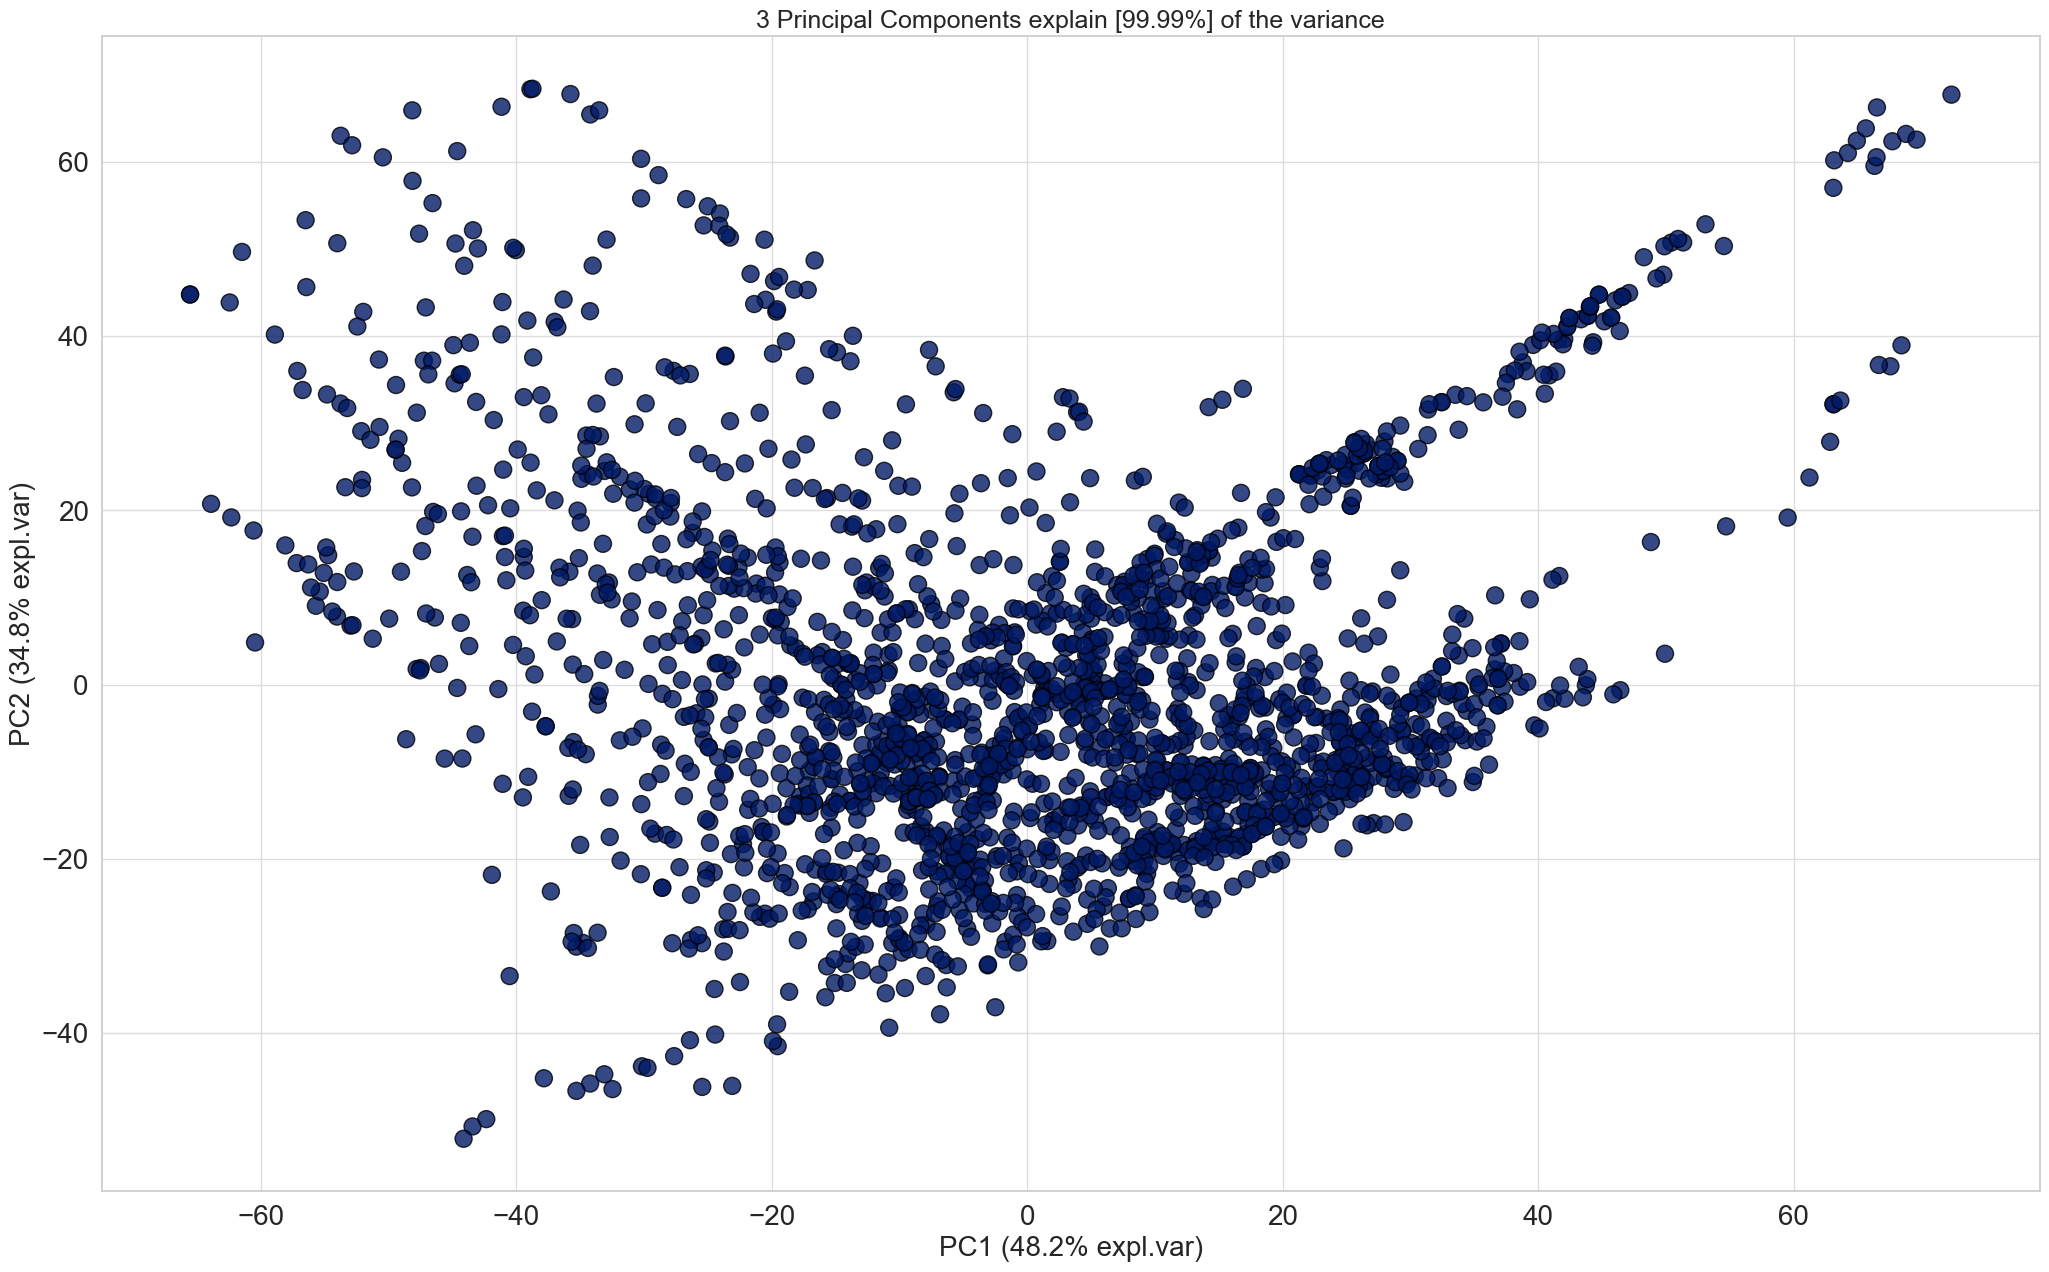

In [31]:
model.scatter(label=True, legend=False)

Eigenvectors

In [32]:
A = out['loadings'].T
A

PC1       PC2  \
accelerations                                       0.000007 -0.000097   
prolongued_decelerations                            0.000010  0.000009   
abnormal_short_term_variability                    -0.369180  0.572023   
percentage_of_time_with_abnormal_long_term_vari... -0.527953  0.518925   
histogram_mode                                     -0.545546 -0.476220   
histogram_mean                                     -0.536052 -0.420383   

                                                         PC3  
accelerations                                      -0.000039  
prolongued_decelerations                           -0.000004  
abnormal_short_term_variability                    -0.732357  
percentage_of_time_with_abnormal_long_term_vari...  0.670677  
histogram_mode                                     -0.108348  
histogram_mean                                     -0.045902

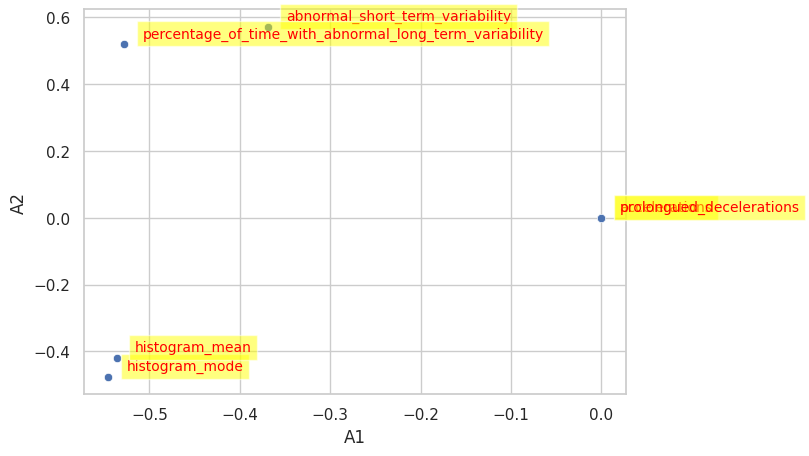

In [33]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('A1')
plt.ylabel('A2')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

Scree Plot

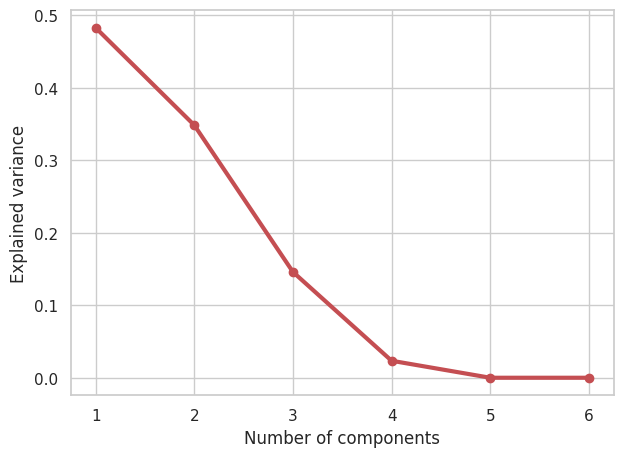

In [34]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

Explained Variance Plot

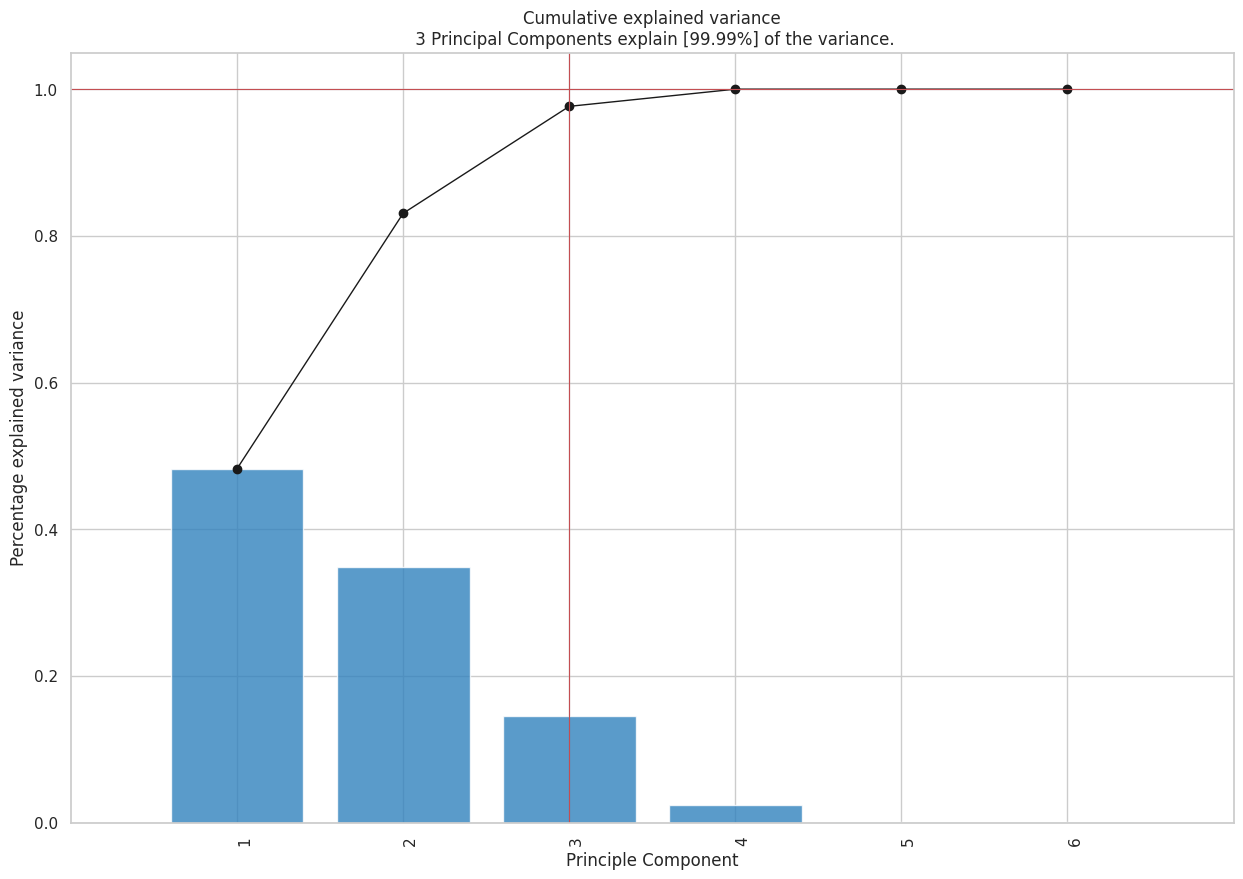

In [35]:
model.plot();

Biplot

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 2500x1500 with 1 Axes>,
 <AxesSubplot: title={'center': '3 Principal Components explain [99.99%] of the variance'}, xlabel='PC1 (48.2% expl.var)', ylabel='PC2 (34.8% expl.var)'>)

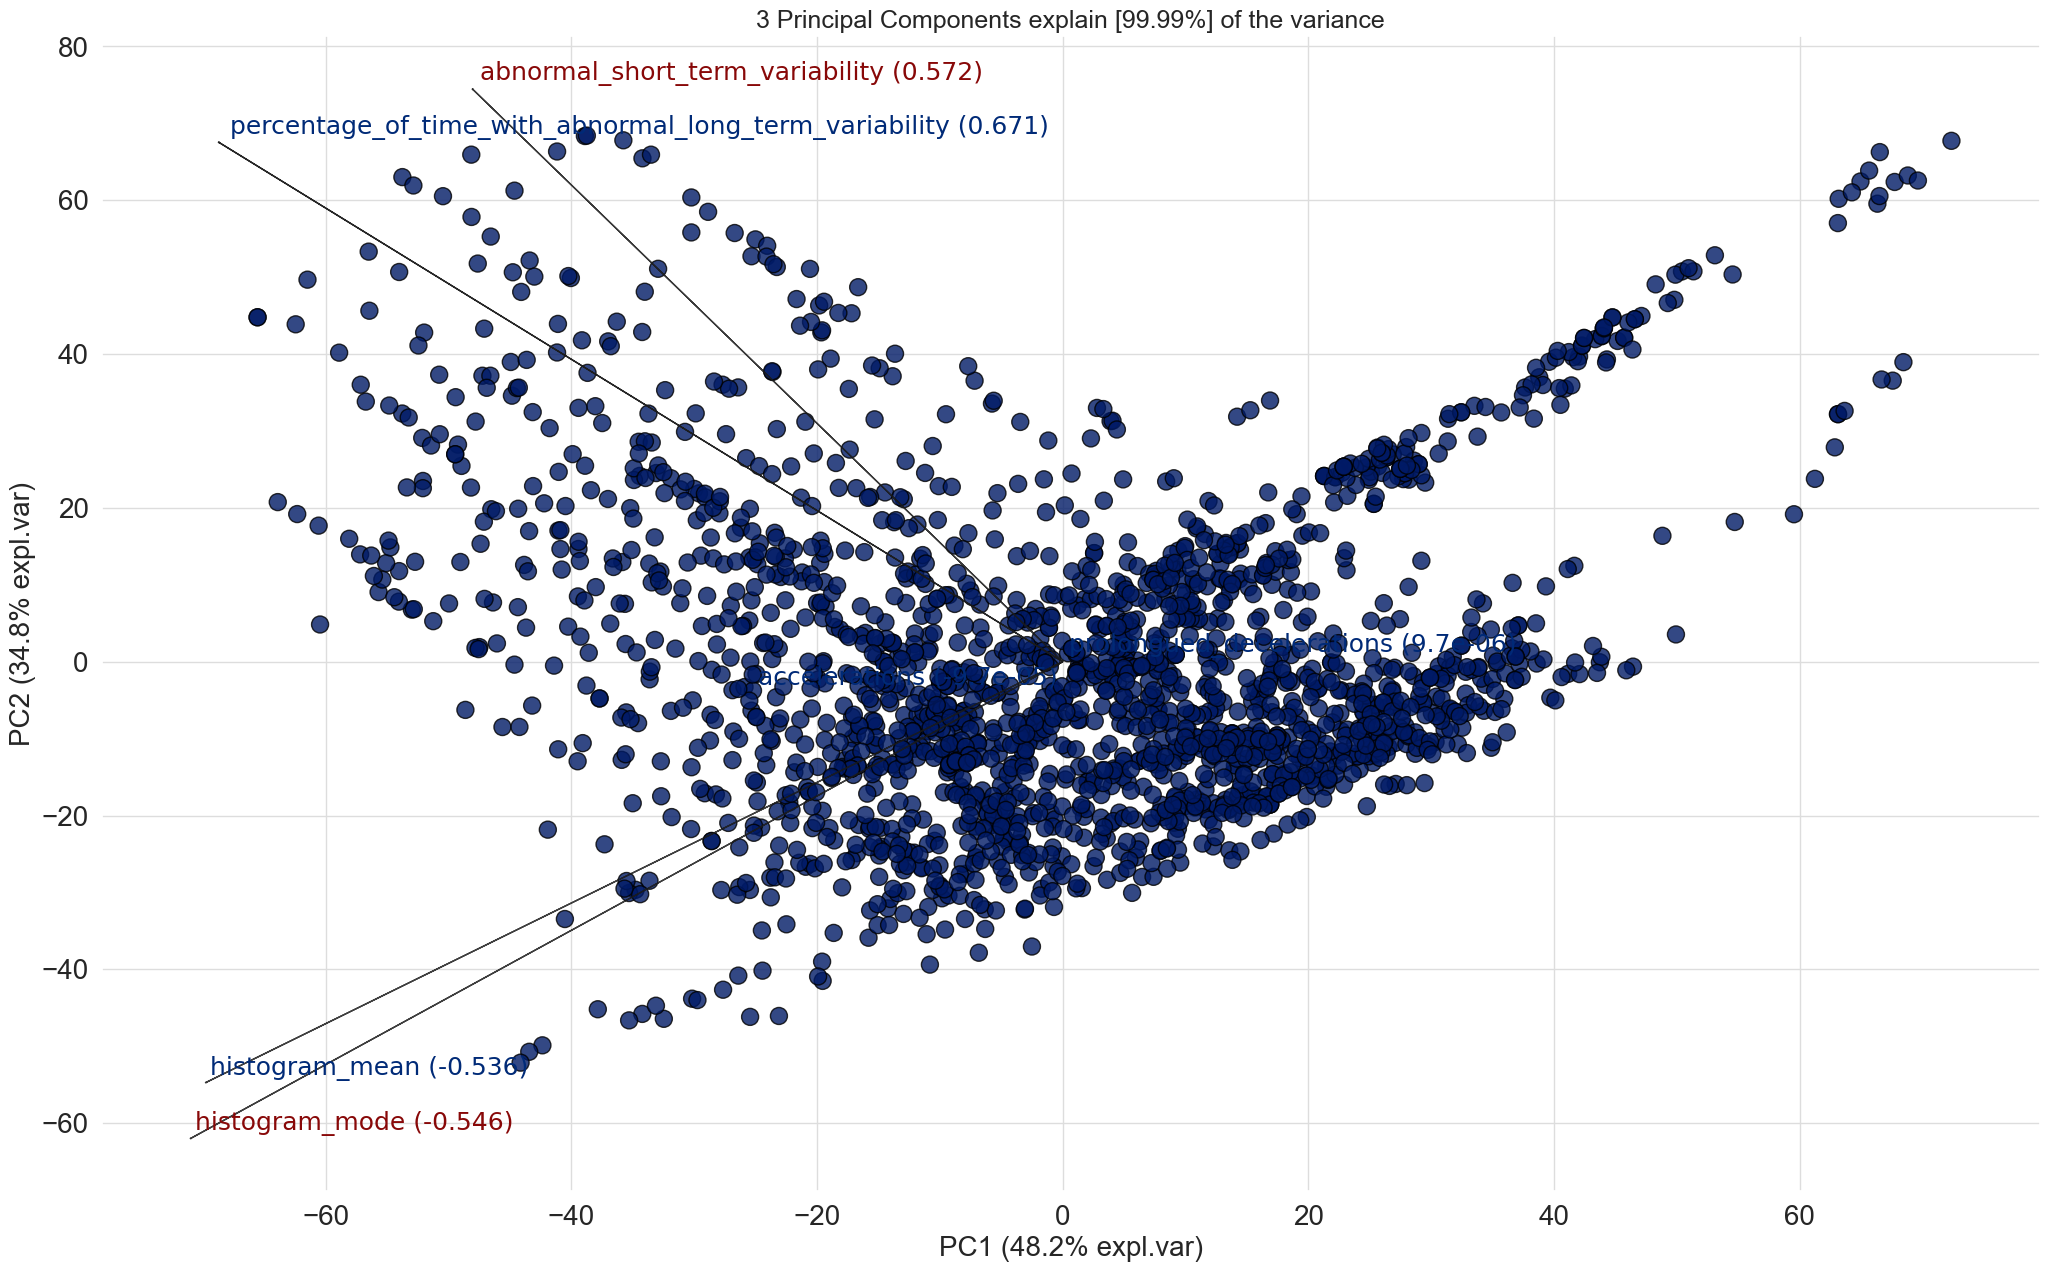

In [38]:
model.biplot(label=False, legend=False, color_arrow='k')

[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


(<Figure size 3000x2500 with 1 Axes>,
 <Axes3DSubplot: title={'center': '3 Principal Components explain [99.99%] of the variance'}, xlabel='PC1 (48.2% expl.var)', ylabel='PC2 (34.8% expl.var)', zlabel='PC3 (14.5% expl.var)'>)

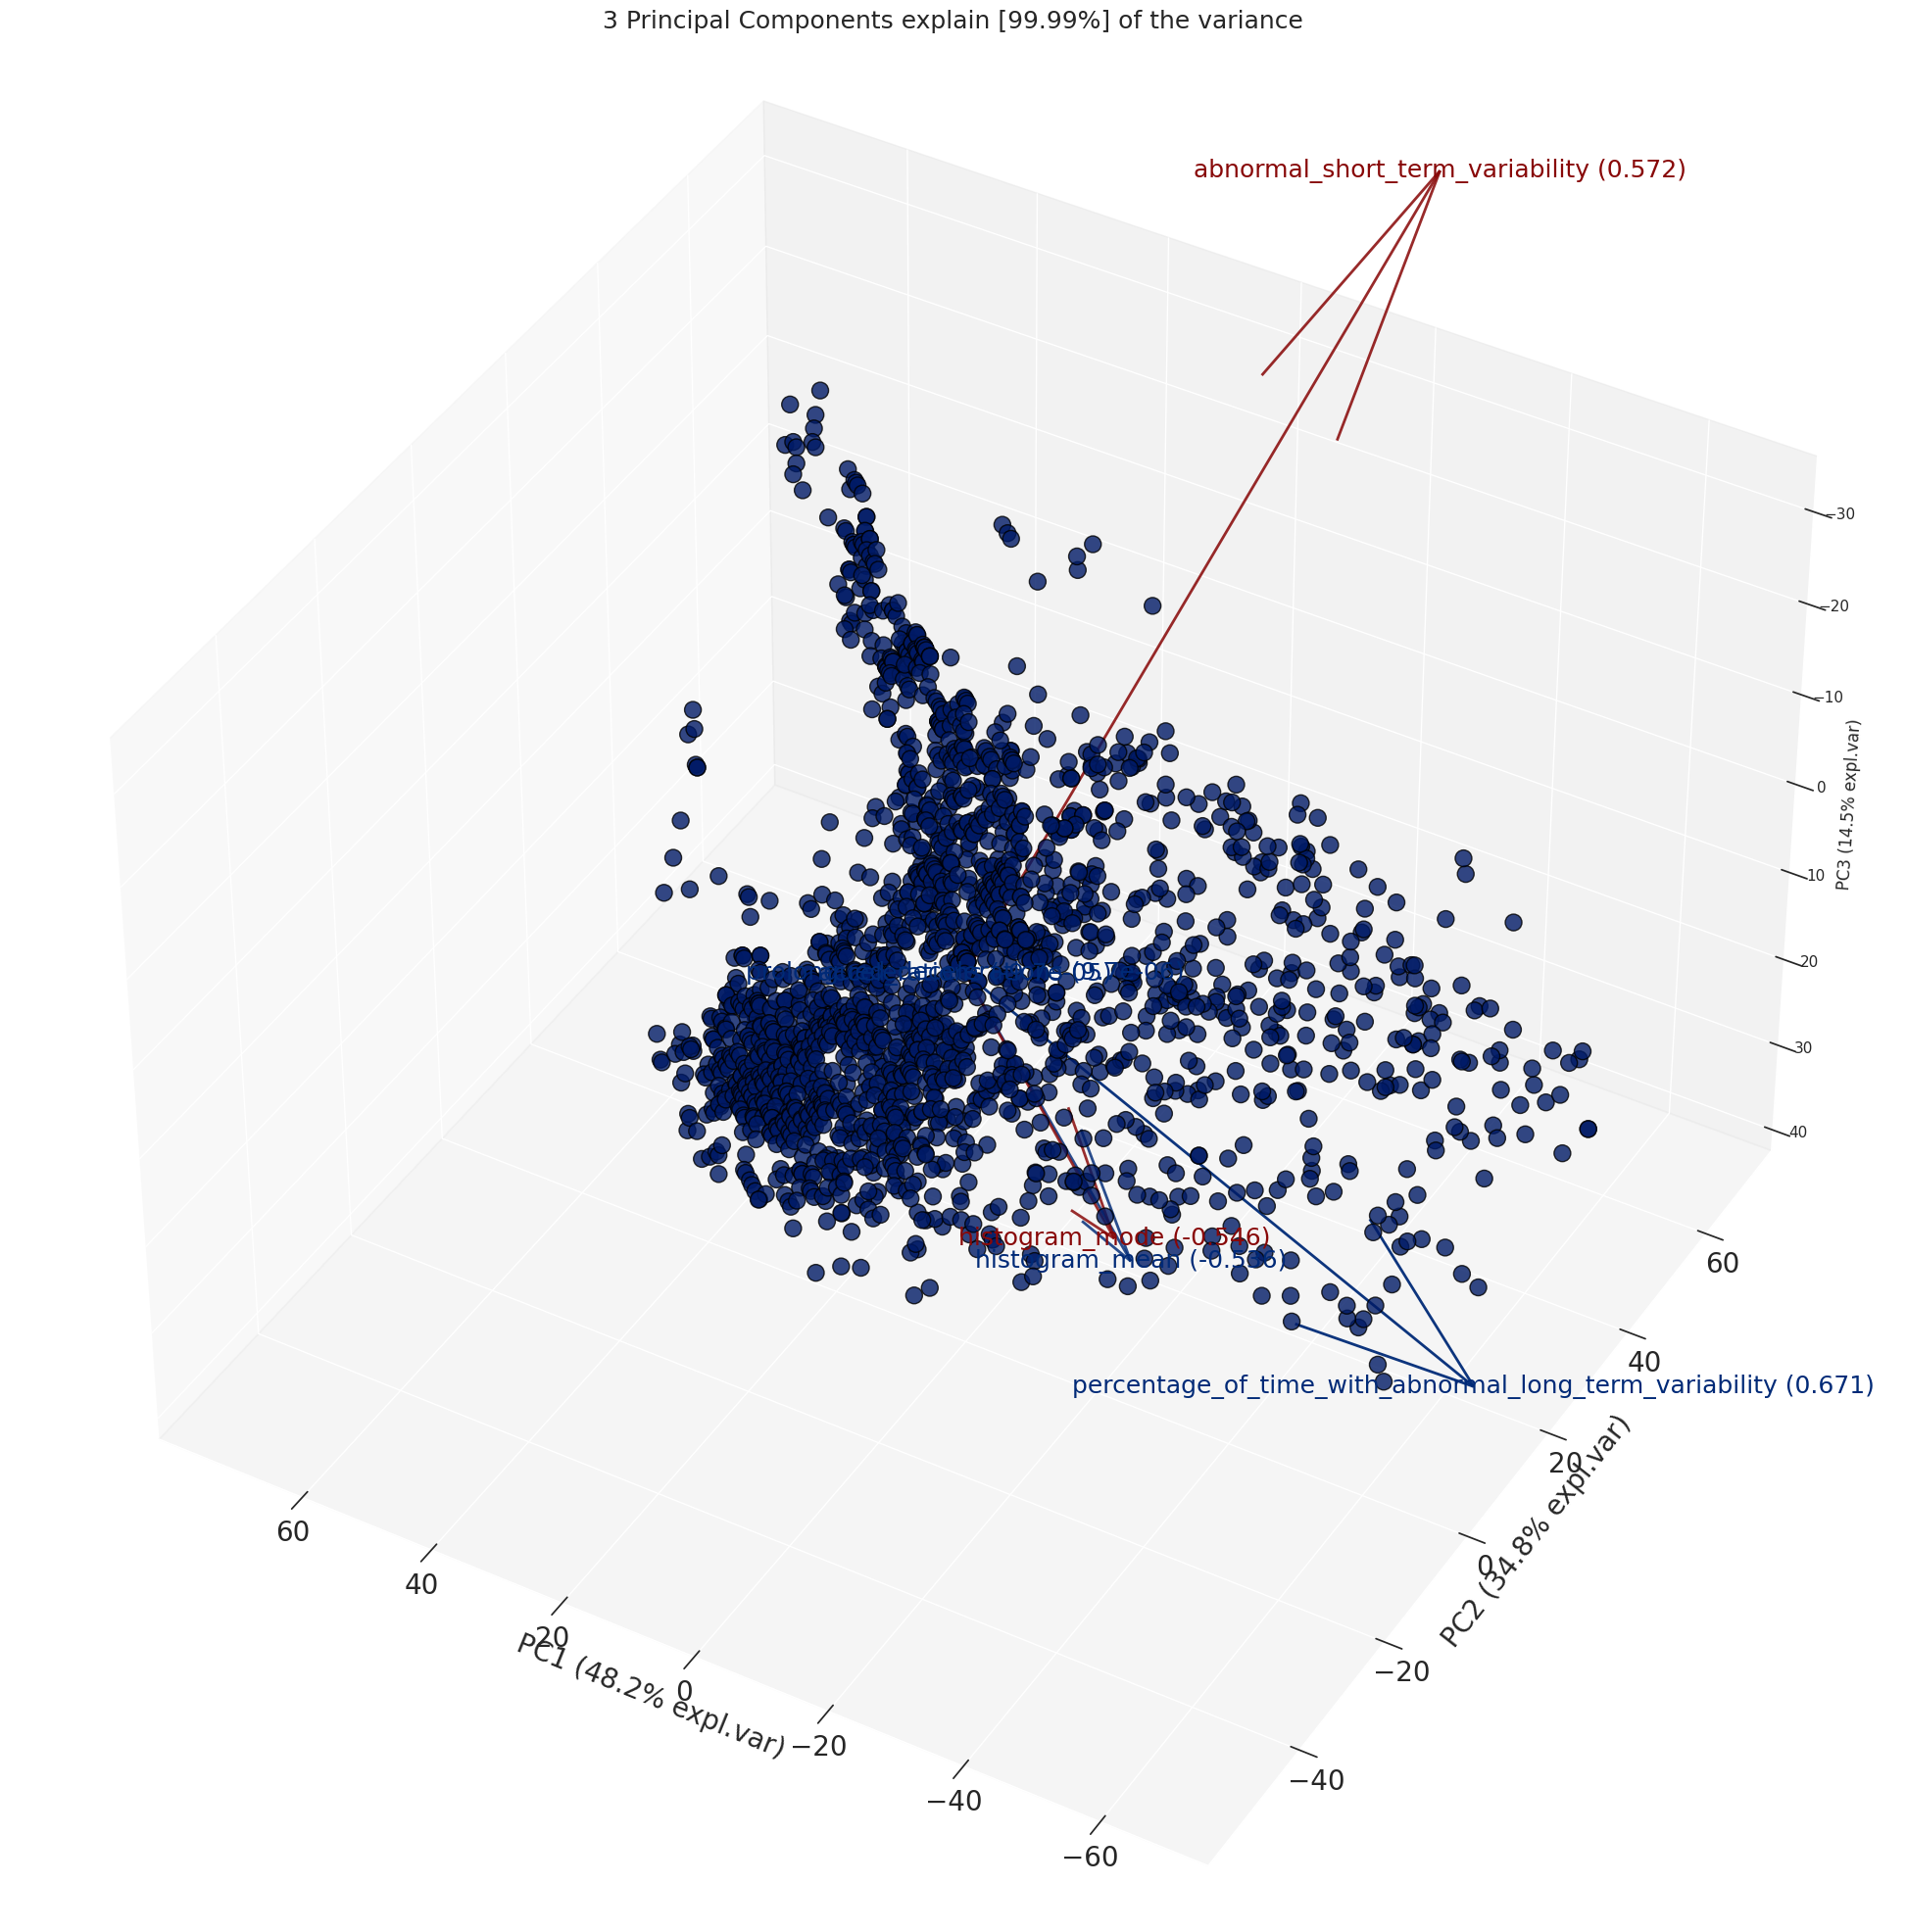

In [39]:
model.biplot3d(legend=False)

## Classification + PCA

In [50]:
clf_pca = setup(data=data, target='fetal_health', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

results = pull()

print(results)

                    Description                   Value
0                    Session id                     123
1                        Target            fetal_health
2                   Target type              Multiclass
3                Target mapping  1.0: 0, 2.0: 1, 3.0: 2
4           Original data shape               (1902, 7)
5        Transformed data shape               (1902, 4)
6   Transformed train set shape               (1331, 4)
7    Transformed test set shape                (571, 4)
8              Numeric features                       6
9                    Preprocess                    True
10              Imputation type                  simple
11           Numeric imputation                    mean
12       Categorical imputation                    mode
13                    Normalize                    True
14             Normalize method                  zscore
15                          PCA                    True
16                   PCA method                 

Comparing All Models

In [51]:
best_model_pca = compare_models()

results = pull()

print(results)

Initiated  . . . . . . . . . . . . . . . . . .              06:13:04
Status     . . . . . . . . . . . . . . . . . .  Loading Dependencies
Estimator  . . . . . . . . . . . . . . . . . .     Compiling Library

Processing:   0%|          | 0/61 [00:00<?, ?it/s]

                                    Model  Accuracy     AUC  Recall   Prec.  \
et                 Extra Trees Classifier    0.9196  0.9727  0.9196  0.9187   
rf               Random Forest Classifier    0.9158  0.9717  0.9158  0.9149   
lightgbm  Light Gradient Boosting Machine    0.9106  0.9688  0.9106  0.9118   
knn                K Neighbors Classifier    0.9083  0.9478  0.9083  0.9080   
dt               Decision Tree Classifier    0.9001  0.8636  0.9001  0.9006   
gbc          Gradient Boosting Classifier    0.9001  0.9616  0.9001  0.9001   
lr                    Logistic Regression    0.8730  0.9379  0.8730  0.8653   
nb                            Naive Bayes    0.8715  0.9482  0.8715  0.8819   
qda       Quadratic Discriminant Analysis    0.8708  0.9493  0.8708  0.8740   
lda          Linear Discriminant Analysis    0.8633  0.9346  0.8633  0.8652   
svm                   SVM - Linear Kernel    0.8558  0.0000  0.8558  0.8443   
ridge                    Ridge Classifier    0.8483 

Best model with PCA

In [65]:
best_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=456, verbose=0, warm_start=False)

In [57]:
tuned_best_model_pca = tune_model(best_model_pca)

results = pull()

print(results)

Initiated  . . . . . . . . . . . . . . . . . .              06:20:12
Status     . . . . . . . . . . . . . . . . . .  Loading Dependencies
Estimator  . . . . . . . . . . . . . . . . . .     Compiling Library

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
      Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.8955  0.9590  0.8955  0.8956  0.8921  0.6983  0.7027
1       0.9098  0.9963  0.9098  0.9169  0.8969  0.7085  0.7378
2       0.8872  0.9588  0.8872  0.8740  0.8754  0.6520  0.6644
3       0.8797  0.9453  0.8797  0.8676  0.8666  0.6293  0.6420
4       0.8722  0.9453  0.8722  0.8546  0.8568  0.5996  0.6147
5       0.8872  0.9605  0.8872  0.8846  0.8751  0.6337  0.6578
6       0.8872  0.9578  0.8872  0.8753  0.8754  0.6458  0.6610
7       0.8647  0.9252  0.8647  0.8450  0.8448  0.5699  0.5955
8       0.8872  0.9673  0.8872  0.8749  0.8720  0.6530  0.6729
9       0.8571  0.9517  0.8571  0.8491  0.8457  0.5587  0.5743
Mean    0.8828  0.9567  0.8828  

Evaluate Best Model

In [58]:
evaluate_model(tuned_best_model_pca)

results = pull()

print(results)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

      Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.8955  0.9590  0.8955  0.8956  0.8921  0.6983  0.7027
1       0.9098  0.9963  0.9098  0.9169  0.8969  0.7085  0.7378
2       0.8872  0.9588  0.8872  0.8740  0.8754  0.6520  0.6644
3       0.8797  0.9453  0.8797  0.8676  0.8666  0.6293  0.6420
4       0.8722  0.9453  0.8722  0.8546  0.8568  0.5996  0.6147
5       0.8872  0.9605  0.8872  0.8846  0.8751  0.6337  0.6578
6       0.8872  0.9578  0.8872  0.8753  0.8754  0.6458  0.6610
7       0.8647  0.9252  0.8647  0.8450  0.8448  0.5699  0.5955
8       0.8872  0.9673  0.8872  0.8749  0.8720  0.6530  0.6729
9       0.8571  0.9517  0.8571  0.8491  0.8457  0.5587  0.5743
Mean    0.8828  0.9567  0.8828  0.8738  0.8701  0.6349  0.6523
Std     0.0144  0.0173  0.0144  0.0208  0.0165  0.0464  0.0462


# Random Forest Classifier Model

In [69]:
rf_pca = create_model('rf')

results = pull()

print(results)

Initiated  . . . . . . . . . . . . . . . . . .              06:35:51
Status     . . . . . . . . . . . . . . . . . .  Loading Dependencies
Estimator  . . . . . . . . . . . . . . . . . .     Compiling Library

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

      Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.9254  0.9816  0.9254  0.9315  0.9271  0.8014  0.8022
1       0.9248  0.9859  0.9248  0.9247  0.9201  0.7785  0.7848
2       0.9398  0.9881  0.9398  0.9377  0.9384  0.8299  0.8308
3       0.9098  0.9667  0.9098  0.9077  0.9083  0.7486  0.7490
4       0.8872  0.9600  0.8872  0.8793  0.8734  0.6529  0.6672
5       0.9248  0.9774  0.9248  0.9257  0.9244  0.7869  0.7878
6       0.9023  0.9739  0.9023  0.8995  0.8979  0.7204  0.7233
7       0.9098  0.9441  0.9098  0.9058  0.9058  0.7413  0.7459
8       0.9398  0.9703  0.9398  0.9393  0.9392  0.8343  0.8350
9       0.8947  0.9691  0.8947  0.8981  0.8945  0.7093  0.7105
Mean    0.9158  0.9717  0.9158  0.9149  0.9129  0.7604  0.7636
Std     0.0171  0.0124  0.0171  0.0188  0.0198  0.0541  0.0514


Tuning Random Forest Classifier Model

In [70]:
tuned_rf_pca = tune_model(rf_pca)

results = pull()

print(results)

Initiated  . . . . . . . . . . . . . . . . . .              06:36:16
Status     . . . . . . . . . . . . . . . . . .  Loading Dependencies
Estimator  . . . . . . . . . . . . . . . . . .     Compiling Library

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
      Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.8507  0.9629  0.8507  0.9203  0.8693  0.6665  0.6984
1       0.9173  0.9745  0.9173  0.9329  0.9211  0.7952  0.8042
2       0.9023  0.9656  0.9023  0.9221  0.9074  0.7604  0.7715
3       0.8797  0.9530  0.8797  0.9157  0.8887  0.7188  0.7390
4       0.8647  0.9458  0.8647  0.8760  0.8687  0.6520  0.6551
5       0.8872  0.9588  0.8872  0.9200  0.8943  0.7257  0.7421
6       0.8797  0.9506  0.8797  0.9011  0.8865  0.7024  0.7105
7       0.8346  0.9375  0.8346  0.8797  0.8499  0.6106  0.6251
8       0.8872  0.9694  0.8872  0.9164  0.8951  0.7353  0.7503
9       0.8571  0.9509  0.8571  0.9064  0.8694  0.6707  0.6934
Mean    0.8761  0.9569  0.8761  

Evaluating tuned random forest classifier model

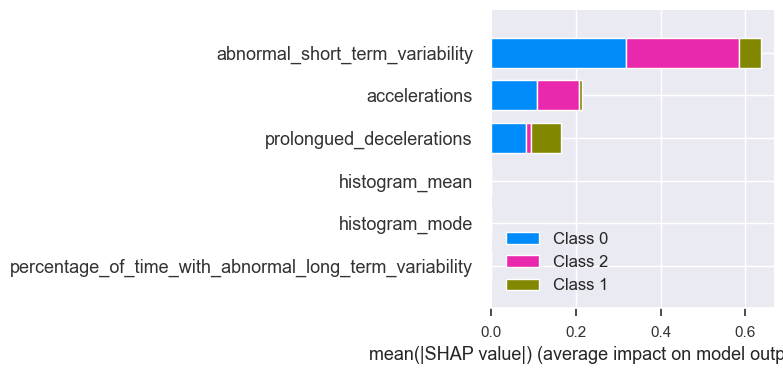

In [113]:
explainer = shap.TreeExplainer(tuned_rf_pca)

shap_values = explainer.shap_values(X)

shap.summary_plot(shap_values, X)

# Extra Trees Classifier Model

In [93]:
et_pca = create_model('et')

results = pull()

print(results)

Initiated  . . . . . . . . . . . . . . . . . .              06:57:51
Status     . . . . . . . . . . . . . . . . . .  Loading Dependencies
Estimator  . . . . . . . . . . . . . . . . . .     Compiling Library

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

      Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.9328  0.9816  0.9328  0.9337  0.9331  0.8191  0.8192
1       0.9173  0.9878  0.9173  0.9140  0.9111  0.7601  0.7649
2       0.9248  0.9899  0.9248  0.9247  0.9226  0.7806  0.7838
3       0.9323  0.9677  0.9323  0.9324  0.9291  0.8035  0.8077
4       0.9023  0.9640  0.9023  0.8956  0.8910  0.6988  0.7129
5       0.9398  0.9835  0.9398  0.9394  0.9394  0.8320  0.8323
6       0.9323  0.9783  0.9323  0.9340  0.9297  0.8064  0.8097
7       0.8872  0.9397  0.8872  0.8843  0.8827  0.6713  0.6772
8       0.9248  0.9769  0.9248  0.9240  0.9241  0.7929  0.7936
9       0.9023  0.9572  0.9023  0.9049  0.9026  0.7373  0.7378
Mean    0.9196  0.9727  0.9196  0.9187  0.9166  0.7702  0.7739
Std     0.0162  0.0148  0.0162  0.0175  0.0180  0.0503  0.0478


Tuning Extra Trees Classifier Model

In [94]:
tuned_et_pca = tune_model(et_pca)

results = pull()

print(results)

Initiated  . . . . . . . . . . . . . . . . . .              06:58:28
Status     . . . . . . . . . . . . . . . . . .  Loading Dependencies
Estimator  . . . . . . . . . . . . . . . . . .     Compiling Library

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
      Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.8955  0.9590  0.8955  0.8956  0.8921  0.6983  0.7027
1       0.9098  0.9963  0.9098  0.9169  0.8969  0.7085  0.7378
2       0.8872  0.9588  0.8872  0.8740  0.8754  0.6520  0.6644
3       0.8797  0.9453  0.8797  0.8676  0.8666  0.6293  0.6420
4       0.8722  0.9453  0.8722  0.8546  0.8568  0.5996  0.6147
5       0.8872  0.9605  0.8872  0.8846  0.8751  0.6337  0.6578
6       0.8872  0.9578  0.8872  0.8753  0.8754  0.6458  0.6610
7       0.8647  0.9252  0.8647  0.8450  0.8448  0.5699  0.5955
8       0.8872  0.9673  0.8872  0.8749  0.8720  0.6530  0.6729
9       0.8571  0.9517  0.8571  0.8491  0.8457  0.5587  0.5743
Mean    0.8828  0.9567  0.8828  

Evaluating tuned extra trees classifier model

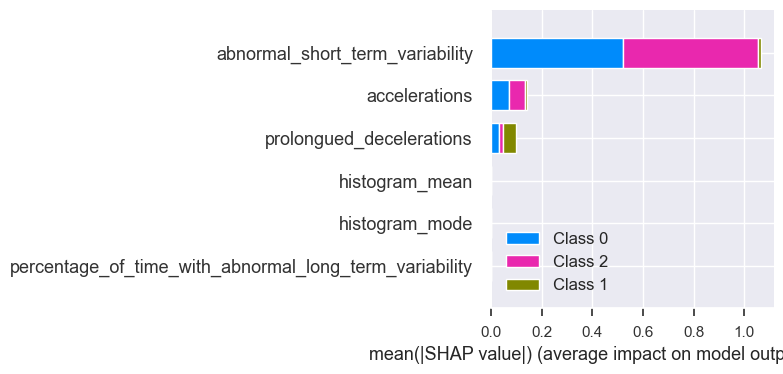

In [114]:
explainer = shap.TreeExplainer(tuned_et_pca)

shap_values = explainer.shap_values(X)

shap.summary_plot(shap_values, X)

# Logistic Regression Model

In [118]:
lr_pca = create_model('lr')

results = pull()

print(results)

Initiated  . . . . . . . . . . . . . . . . . .              07:24:58
Status     . . . . . . . . . . . . . . . . . .  Loading Dependencies
Estimator  . . . . . . . . . . . . . . . . . .     Compiling Library

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

      Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.8806  0.9369  0.8806  0.8786  0.8790  0.6695  0.6702
1       0.9398  0.9942  0.9398  0.9446  0.9325  0.8205  0.8314
2       0.8722  0.9390  0.8722  0.8660  0.8685  0.6331  0.6345
3       0.8496  0.9218  0.8496  0.8431  0.8439  0.5699  0.5721
4       0.8797  0.9210  0.8797  0.8657  0.8675  0.6288  0.6408
5       0.8797  0.9382  0.8797  0.8676  0.8662  0.6159  0.6344
6       0.8647  0.9309  0.8647  0.8533  0.8554  0.5951  0.6014
7       0.8496  0.9145  0.8496  0.8279  0.8289  0.5221  0.5456
8       0.8722  0.9499  0.8722  0.8685  0.8607  0.6248  0.6355
9       0.8421  0.9331  0.8421  0.8378  0.8391  0.5588  0.5599
Mean    0.8730  0.9379  0.8730  0.8653  0.8642  0.6238  0.6326
Std     0.0260  0.0212  0.0260  0.0305  0.0270  0.0770  0.0765


Tuning Logistic Regression Model

In [119]:
tuned_lr_pca = tune_model(lr_pca)

results = pull()

print(results)

Initiated  . . . . . . . . . . . . . . . . . .              07:25:47
Status     . . . . . . . . . . . . . . . . . .  Loading Dependencies
Estimator  . . . . . . . . . . . . . . . . . .     Compiling Library

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
      Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.8881  0.9365  0.8881  0.8839  0.8852  0.6860  0.6874
1       0.9323  0.9925  0.9323  0.9283  0.9270  0.7973  0.8051
2       0.8647  0.9396  0.8647  0.8546  0.8554  0.5871  0.5949
3       0.8496  0.9195  0.8496  0.8371  0.8402  0.5570  0.5616
4       0.8797  0.9240  0.8797  0.8657  0.8675  0.6288  0.6408
5       0.8797  0.9410  0.8797  0.8676  0.8662  0.6159  0.6344
6       0.8722  0.9322  0.8722  0.8613  0.8640  0.6171  0.6231
7       0.8496  0.9137  0.8496  0.8279  0.8289  0.5221  0.5456
8       0.8647  0.9480  0.8647  0.8524  0.8538  0.6017  0.6101
9       0.8496  0.9359  0.8496  0.8377  0.8395  0.5493  0.5584
Mean    0.8730  0.9383  0.8730  

Evaluating tuned logistic regression model

In [120]:
explainer = shap.KernelExplainer(tuned_lr_pca)

shap_values = explainer.shap_values(X)

shap.summary_plot(shap_values, X)

TypeError: KernelExplainer.__init__() missing 1 required positional argument: 'data'